现在你已经看到了如何使用 scikit-learn 中的 PCA 库, 并将其在手写数字数据集上拟合, 那么我们应该更仔细地了解 PCA 究竟给我们返回什么, 以及这些不同部分的含义。 让我们接着上一个视频的结尾开始。下面我导入了之前使用的库，并将图像数据分割为标签和特征，并绘制了数据集中的前30个图像。

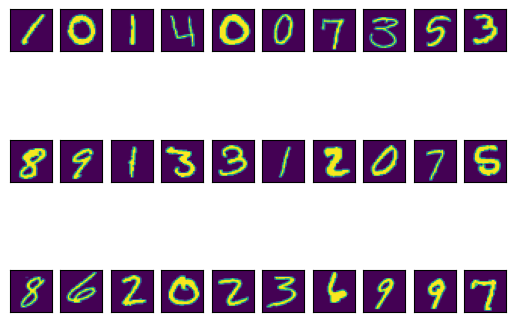

In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from helper_functions import show_images, show_images_by_digit, fit_random_forest_classifier2 
from helper_functions import fit_random_forest_classifier, do_pca, plot_components

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#read in our dataset
train = pd.read_csv('./data/train.csv')
train.fillna(0, inplace=True)

# save the labels to a Pandas series target
y = train['label']
# Drop the label feature
train.fillna(0, inplace=True)
X = train.drop("label",axis=1)

show_images(30)

现在让我们用15个成分来拟合 PCA，然后看看我们得到的 PCA 对象上的一些主要特征。

In [2]:
pca, X_pca = do_pca(15, X)

需要考虑的主要特征之一是所谓的 explained_variance_ratio 。我创建了一个 碎石图（scree_plot）来显示这 15 个成分的 explained_variance_ratio 。

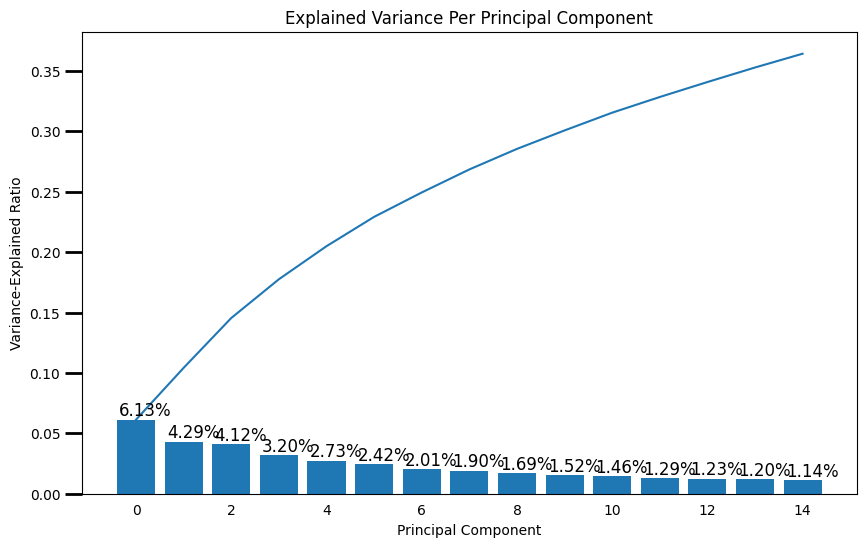

In [3]:
def scree_plot(pca):
    '''
    Creates a scree plot associated with the principal components 
    
    INPUT: pca - the result of instantian of PCA in scikit learn
            
    OUTPUT:
            None
    '''
    num_components = len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
 
    plt.figure(figsize=(10, 6))
    ax = plt.subplot(111)
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals)
    ax.plot(ind, cumvals)
    for i in range(num_components):
        ax.annotate(r"%s%%" % ((str(vals[i]*100)[:4])), (ind[i]+0.2, vals[i]), va="bottom", ha="center", fontsize=12)
 
    ax.xaxis.set_tick_params(width=0)
    ax.yaxis.set_tick_params(width=2, length=12)
 
    ax.set_xlabel("Principal Component")
    ax.set_ylabel("Variance-Explained Ratio")
    plt.title('Explained Variance Per Principal Component')
    

scree_plot(pca)

每个柱表示每个成分所解释的变化量。所以你可以看到第一成分解释了 6.13% 的图像数据的可变性。第二个解释了 4.29% 的变化量等等。通常，成分的数量是根据成分解释的总变化量来选择的。你可以看到，通过使用15个成分，我们可以捕获图像中几乎 35% 的总变化量。

让我们看看，我们是否能更好地了解成分可能为图像的哪些方面提供信息。 为此，我们将使用PCA对象的成分属性。从成分的形状可以看出，每个成分都给出了各个像素的权重。

In [4]:
pca.components_.shape

(15, 784)

我在下面创建了一个函数，以图像的形式绘制每个成分的权重。 图像中较暗（深蓝色）的部分表示此区域像素的权重较轻，而这些亮黄色像素则表示此部分像素的权重较重。

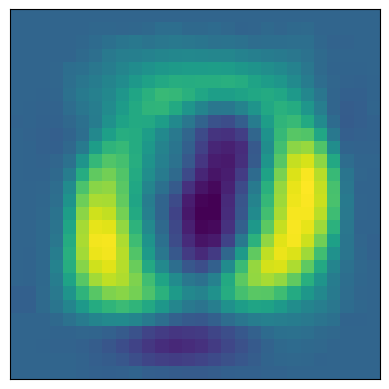

In [5]:

def plot_component(pca, comp):
    '''
    Plots an image associated with each component to understand how the weighting 
    of the components 
    INPUT: 
          pca - pca object created from PCA in sklearn
          comp - int - the component you want to see starting at 0
    OUTPUT
          None
    '''
    if comp <= len(pca.components_):
        mat_data = np.asmatrix(pca.components_[comp]).reshape(28,28)  #reshape images
        plt.imshow(mat_data); #plot the data
        plt.xticks([]) #removes numbered labels on x-axis
        plt.yticks([]) #removes numbered labels on y-axis   
    else:
        print('That is not the right input, please read the docstring before continuing.')
        
#Plot the first component
plot_component(pca, 0)

看这张图片，与其他数字相比，只使用两个成分就可以很好地分离 0。 最高的权重与看起来非常像 0 的像素相关联。

现在轮到你了！